### The imports:

In [114]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
plt.rcParams["figure.figsize"] = (12,3)

In [73]:
data = pd.read_csv('ground.csv')
data.head()

,Unnamed: 0,TIMESTAMP,Pyra1_Wm2_Avg,Pyra2_Wm2_Avg,RECORD,AmbTemp_C_Avg,InvPAC_kW_Avg,InvPDC_kW_Avg,PwrMtrP_kW_Avg
0,0,2017-09-01 00:00:00-05:00,-8.791522,-3.418324,565528.0,20.30,0.0,0.0,0.0
1,1,2017-09-01 00:01:00-05:00,-8.791522,-3.418324,565529.0,20.35,0.0,0.0,0.0
2,2,2017-09-01 00:02:00-05:00,-9.029131,-3.418324,565530.0,20.33,0.0,0.0,0.0
3,3,2017-09-01 00:03:00-05:00,-9.147935,-3.418324,565531.0,20.26,0.0,0.0,0.0
4,4,2017-09-01 00:04:00-05:00,-9.147935,-3.418324,565532.0,20.26,0.0,0.0,0.0


In [74]:
data['TIMESTAMP'] = data['TIMESTAMP'].map(lambda x: str(x)[:-6])

mask = data.AmbTemp_C_Avg < 0
column_name = 'AmbTemp_C_Avg'
data.loc[mask, column_name] = 0

mask = data.InvPDC_kW_Avg < 0
column_name = 'InvPDC_kW_Avg'
data.loc[mask, column_name] = 0

data = data.drop(data[data.AmbTemp_C_Avg < 0].index)
data = data.drop(data[data.InvPDC_kW_Avg < 0].index)
data = data.fillna(0)
data = data.drop(['Unnamed: 0', 'RECORD'], axis=1)
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data.head()

,TIMESTAMP,Pyra1_Wm2_Avg,Pyra2_Wm2_Avg,AmbTemp_C_Avg,InvPAC_kW_Avg,InvPDC_kW_Avg,PwrMtrP_kW_Avg
0,2017-09-01 00:00:00,-8.791522,-3.418324,20.30,0.0,0.0,0.0
1,2017-09-01 00:01:00,-8.791522,-3.418324,20.35,0.0,0.0,0.0
2,2017-09-01 00:02:00,-9.029131,-3.418324,20.33,0.0,0.0,0.0
3,2017-09-01 00:03:00,-9.147935,-3.418324,20.26,0.0,0.0,0.0
4,2017-09-01 00:04:00,-9.147935,-3.418324,20.26,0.0,0.0,0.0


# Linear Regression

In [75]:
# for the train-test random split, linearRegression, and error calculation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [76]:
linreg=LinearRegression()
def performLinearRegression(X_train, X_test, y_train, y_test, display = True):
    '''
    Performs Linear Regression.
    Parameters: Train and Test Data (X_train, X_test)=> Predictors, (y_train, y_test)=> Response
    
    if display == True (by default):
        Prints the intercepts and coefficients of linear regression
        Plots Two graphs:
            1. (True values of Train Data) vs (Predicted values of train data using the model)
            2. (True values of TEST Data) vs (Predicted values of TEST data using the model) <TEST data not encountered before>
        Goodness of fit on train and test:
            a. R^2 : higher the better (1-(MSE/var))
            b. MSE : same as analysing RMSE, lower the better
    
    returns (MSE_test, MSE_train)
    
    Example:
    >>> X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.25)
    >>> columns = ['ColName1', 'ColName2'] # controls the predictor columns
    >>> performLinearRegression(pd.DataFrame(X_train[columns]), pd.DataFrame(X_test[columns]), y_train, y_test, display=False) # passing new predictors, same responses
    '''
    linreg.fit(X_train, y_train)    
    # Predict the Response values from Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    if display:
        print('RegressionInfo:\n\tIntercept: b = {}\n\tCoefficients: a = {} '.format(linreg.intercept_, linreg.coef_))
        # Plot the Predictions vs the True values
        f, axes = plt.subplots(1, 2, figsize=(24, 12))
        axes[0].scatter(y_train, y_train_pred, color = "blue")
        axes[0].plot(y_train, y_train, 'w-', linewidth = 1) # basically y=x
        axes[0].set_xlabel("True values of the Response Variable (Train)")
        axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
        axes[1].scatter(y_test, y_test_pred, color = "green")
        axes[1].plot(y_test, y_test, 'w-', linewidth = 1)# basically y=x
        axes[1].set_xlabel("True values of the Response Variable (Test)")
        axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
        plt.show()

        # Check the Goodness of Fit (on Train Data)
        print("Goodness of Fit of Model \tTrain Dataset")
        print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
        print()

        # Check the Goodness of Fit (on Test Data)
        print("Goodness of Fit of Model \tTest Dataset")
        print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
        print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
        print()
    
    # returning values needed
    return [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)]

RegressionInfo:
	Intercept: b = [2.71487235]
	Coefficients: a = [[-0.02843072 -0.06381632  0.2964161 ]] 


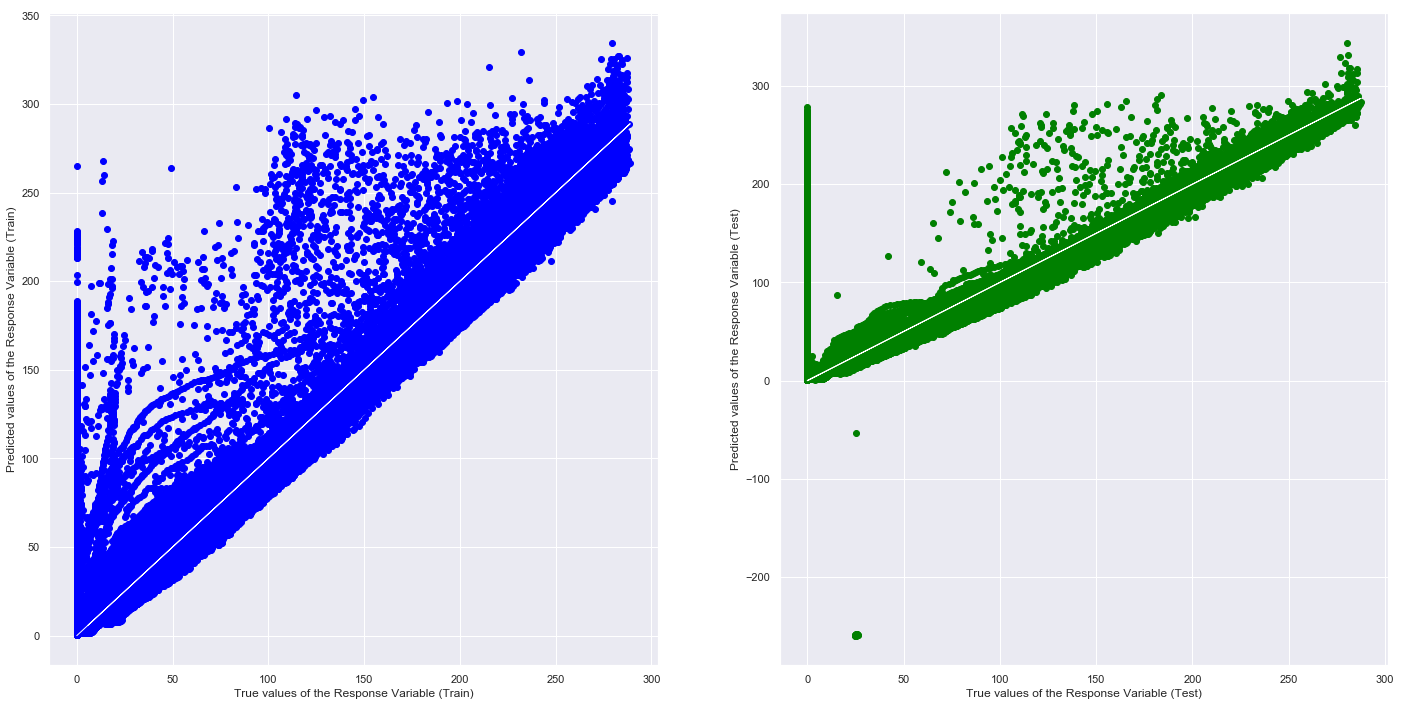

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.973792422899891
Mean Squared Error (MSE) 	: 139.91691249898267

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9368429241927023
Mean Squared Error (MSE) 	: 360.7874019422421



[139.91691249898267, 360.7874019422421]

In [96]:
predictors= pd.DataFrame(data[['AmbTemp_C_Avg', 'Pyra1_Wm2_Avg', 'Pyra2_Wm2_Avg']])
response=pd.DataFrame(data['InvPDC_kW_Avg'])

predictors=predictors[predictors.Pyra1_Wm2_Avg.notnull()]
predictors=predictors[predictors.AmbTemp_C_Avg.notnull()]
predictors=predictors[predictors.Pyra2_Wm2_Avg.notnull()]
response=response[response.InvPDC_kW_Avg.notnull()]

X_train, X_test, y_train, y_test = predictors[:394200], predictors[394200:], response[:394200], response[394200:]#train_test_split(predictors, response, test_size = 0.25)
performLinearRegression(X_train, X_test, y_train, y_test)
                        

In [94]:
X_train.shape
predictors[:394200].describe()

,AmbTemp_C_Avg,Pyra1_Wm2_Avg,Pyra2_Wm2_Avg
count,394200.000000,394200.000000,394200.000000
mean,13.980858,150.650260,181.879445
std,9.999434,259.847609,298.258039
min,0.000000,-18.771087,-8.461754
25%,4.760750,-9.504348,-3.866629
50%,13.910000,-6.653044,-1.513029
75%,22.650000,226.678712,267.834135
max,38.850000,1350.805530,1413.225006


In [106]:
y_hats2 = linreg.predict(pd.DataFrame(data[['AmbTemp_C_Avg', 'Pyra1_Wm2_Avg', 'Pyra2_Wm2_Avg']]))

data['Predicted DC'] = y_hats2

data = data.rename(columns={'InvPDC_kW_Avg':'Actual DC'}, index=str)

In [107]:
data.head()

,TIMESTAMP,Pyra1_Wm2_Avg,Pyra2_Wm2_Avg,AmbTemp_C_Avg,InvPAC_kW_Avg,Actual DC,PwrMtrP_kW_Avg,y_hats,Predicted DC
0,2017-09-01 00:00:00,-8.791522,-3.418324,20.30,0.0,0.0,0.0,1.685525,1.685525
1,2017-09-01 00:01:00,-8.791522,-3.418324,20.35,0.0,0.0,0.0,1.684103,1.684103
2,2017-09-01 00:02:00,-9.029131,-3.418324,20.33,0.0,0.0,0.0,1.699835,1.699835
3,2017-09-01 00:03:00,-9.147935,-3.418324,20.26,0.0,0.0,0.0,1.709407,1.709407
4,2017-09-01 00:04:00,-9.147935,-3.418324,20.26,0.0,0.0,0.0,1.709407,1.709407


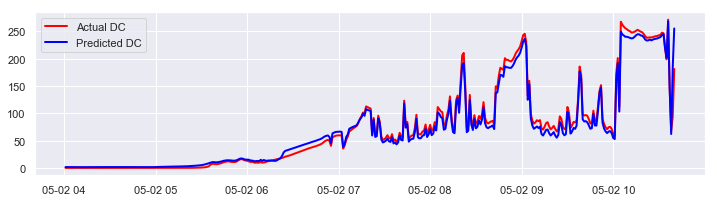

In [124]:
plt.plot( 'TIMESTAMP', 'Actual DC', data=data.iloc[394801:395201], marker='', color='red', linewidth=2)
plt.plot( 'TIMESTAMP', 'Predicted DC', data=data.iloc[394801:395201], marker='', color='blue', linewidth=2)
plt.legend()
plt.savefig('DC.png')

RegressionInfo:
	Intercept: b = [1.78745958]
	Coefficients: a = [[-0.06912005 -0.07676222  0.28697015]] 


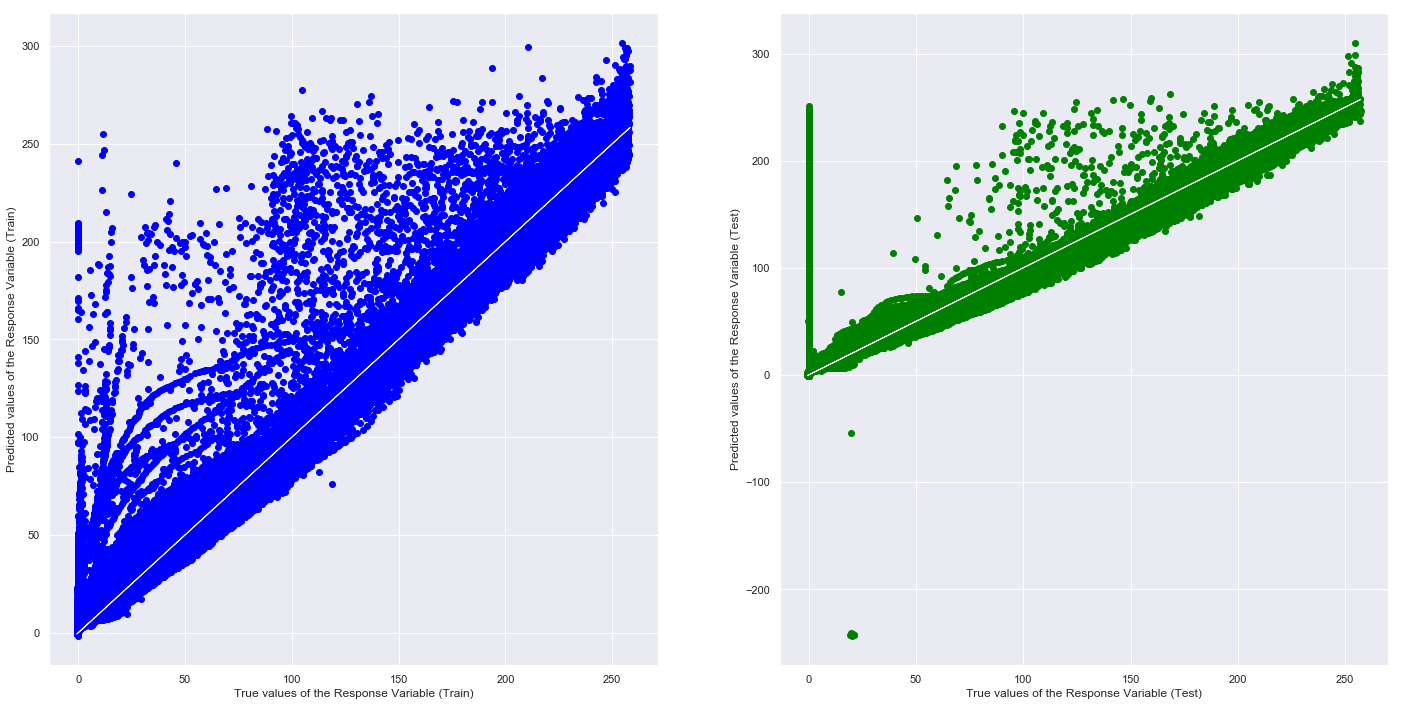

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9828452638430049
Mean Squared Error (MSE) 	: 75.79250819071942

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9383724141709154
Mean Squared Error (MSE) 	: 289.2516398105909



[75.79250819071942, 289.2516398105909]

In [116]:
predictors= pd.DataFrame(data[['AmbTemp_C_Avg', 'Pyra1_Wm2_Avg', 'Pyra2_Wm2_Avg']])
response=pd.DataFrame(data['PwrMtrP_kW_Avg'])

predictors=predictors[predictors.Pyra1_Wm2_Avg.notnull()]
predictors=predictors[predictors.AmbTemp_C_Avg.notnull()]
predictors=predictors[predictors.Pyra2_Wm2_Avg.notnull()]
response=response[response.PwrMtrP_kW_Avg.notnull()]

X_train, X_test, y_train, y_test = predictors[:394200], predictors[394200:], response[:394200], response[394200:]#train_test_split(predictors, response, test_size = 0.25)
performLinearRegression(X_train, X_test, y_train, y_test)

In [122]:
y_hats21 = linreg.predict(pd.DataFrame(data[['AmbTemp_C_Avg', 'Pyra1_Wm2_Avg', 'Pyra2_Wm2_Avg']]))

data['Predicted Power Meter'] = y_hats21

data = data.rename(columns={'PwrMtrP_kW_Avg':'Actual Power Meter'}, index=str)

data.sample()

,TIMESTAMP,Pyra1_Wm2_Avg,Pyra2_Wm2_Avg,AmbTemp_C_Avg,InvPAC_kW_Avg,Actual DC,Actual Power Meter,y_hats,Predicted DC,Predicted Power Meter
486027,2017-10-04 12:27:00,726.369789,952.591814,24.67,204.2,225.7,203.4,238.022788,238.022788,217.689927


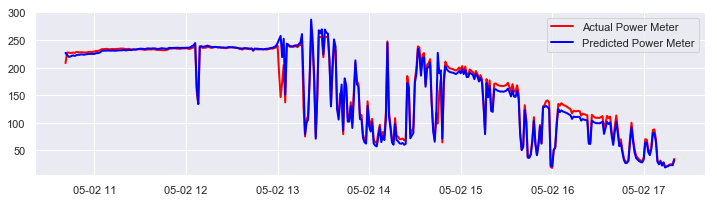

In [125]:
plt.plot( 'TIMESTAMP', 'Actual Power Meter', data=data.iloc[395201:395601], marker='', color='red', linewidth=2)
plt.plot( 'TIMESTAMP', 'Predicted Power Meter', data=data.iloc[395201:395601], marker='', color='blue', linewidth=2)
plt.legend()
plt.savefig('PwrMtr.png')